### RFM 분석 실습
#### 사용자별로 얼마나 최근에, 얼마나 자주, 얼마나 많은 금액을 지출했는지에 따라 사용자들의 분포를 확인하거나 사용자 그룹(또는 등급)을 나누어 분류하는 분석 기법이다. 구매 가능성이 높은 고객을 선정할 때 용이한 데이터 분석방법이며, 사용자들의 평소 구매 패턴을 기준으로 분류를 진행하기 때문에 각 사용자 그룹의 특성에 따라 차별화된 마케팅 메시지를 전달할 수 있다.
- Recency : 얼마나 최근에 구매했는가
- Frequency : 얼마나 자주 구매했는가
- Monetary : 얼마나 많은 금액을 지출했는가

### 고객 분석
- CustomerID: 고객 번호
- PurchaseDate: 구매 날짜
- TransactionAmount: 결제 금액 
- ProductInformation: 상품 정보
- OrderID: 주문 번호
- Location: 주문 지역

In [1]:
import pandas as pd

customer_order_df = pd.read_csv('./datasets/customer_order_data.csv')
customer_order_df

,CustomerID,PurchaseDate,TransactionAmount,ProductInformation,OrderID,Location
0,8814,2023-04-11,943.31,Product C,890075,Tokyo
1,2188,2023-04-11,463.70,Product A,176819,London
2,4608,2023-04-11,80.28,Product A,340062,New York
3,2559,2023-04-11,221.29,Product A,239145,London
4,9482,2023-04-11,739.56,Product A,194545,Paris
...,...,...,...,...,...,...
995,2970,2023-06-10,759.62,Product B,275284,London
996,6669,2023-06-10,941.50,Product C,987025,New York
997,8836,2023-06-10,545.36,Product C,512842,London
998,1440,2023-06-10,729.94,Product B,559753,Paris


### 결측치 검사
📌 결측치: 값이 없는 것, Null 또는 NA로 표현.

In [2]:
customer_order_df.isna().sum().sum()

0

### 중복 행 검사

In [3]:
customer_order_df.duplicated().sum()

0

### 데이터 전처리
> 데이터 유형을 변환하거나 데이터 분석에 용이한 형태로 변환하는 작업을 통해,  
불필요한 컬럼 삭제, 열 병합 등을 통해 데이터를 정제하는 처리방식
- PurchaseDate를 오늘 날짜로부터 몇 일 차이인지로 변환 후 최근 구매 척도인 Recency로 변환
- TransactionAmount를 지출 금액의 척도인 Monetary로 변환
- CustomerID별 구매 횟수를 구매 빈도의 척도인 Frequency로 변환

In [4]:
customer_order_df['Recency'] = pd.to_datetime(customer_order_df['PurchaseDate']).apply(lambda x: (pd.to_datetime('2023-10-04') - x).days)
customer_order_df.drop(['PurchaseDate'], axis=1, inplace=True)

In [5]:
customer_order_df

,CustomerID,TransactionAmount,ProductInformation,OrderID,Location,Recency
0,8814,943.31,Product C,890075,Tokyo,176
1,2188,463.70,Product A,176819,London,176
2,4608,80.28,Product A,340062,New York,176
3,2559,221.29,Product A,239145,London,176
4,9482,739.56,Product A,194545,Paris,176
...,...,...,...,...,...,...
995,2970,759.62,Product B,275284,London,116
996,6669,941.50,Product C,987025,New York,116
997,8836,545.36,Product C,512842,London,116
998,1440,729.94,Product B,559753,Paris,116


In [6]:
customer_order_df = customer_order_df.rename(columns={'TransactionAmount': 'Monetary'})
customer_order_df

,CustomerID,Monetary,ProductInformation,OrderID,Location,Recency
0,8814,943.31,Product C,890075,Tokyo,176
1,2188,463.70,Product A,176819,London,176
2,4608,80.28,Product A,340062,New York,176
3,2559,221.29,Product A,239145,London,176
4,9482,739.56,Product A,194545,Paris,176
...,...,...,...,...,...,...
995,2970,759.62,Product B,275284,London,116
996,6669,941.50,Product C,987025,New York,116
997,8836,545.36,Product C,512842,London,116
998,1440,729.94,Product B,559753,Paris,116


In [7]:
display(customer_order_df.groupby(by='CustomerID')[['OrderID']].count().sort_values(by="OrderID", ascending=False).head(20))
customer_order_df.groupby(by='CustomerID')[['OrderID']].count()

,OrderID
CustomerID,
5557,3
7363,3
4804,3
1011,2
2133,2
7971,2
3262,2
8216,2
8317,2


,OrderID
CustomerID,
1011,2
1025,1
1029,1
1046,1
1049,1
...,...
9941,1
9950,1
9954,1


In [8]:
customer_order_df_rfm = customer_order_df.groupby('CustomerID') \
    .agg({'CustomerID': 'count', 'Recency': 'min', 'Monetary': 'sum'}) \
    .rename(columns={'CustomerID': 'Frequency'})

customer_order_df_rfm = customer_order_df_rfm.reset_index()

customer_order_df_rfm

,CustomerID,Frequency,Recency,Monetary
0,1011,2,149,1129.02
1,1025,1,137,359.29
2,1029,1,116,704.99
3,1046,1,159,859.82
4,1049,1,129,225.72
...,...,...,...,...
941,9941,1,158,960.53
942,9950,1,154,679.11
943,9954,1,128,798.01
944,9985,1,173,36.10


### 정규화(Normalization)
값의 범위를 0~1사이로 변환시켜 모든 컬럼의 데이터가 평등하게 만들어준다.  
서로 다른 단위의 값은 비교대상이 될 수 없다. 예를 들어, 80kg과 180cm는 비교할 수 없기에 정규화를 사용하여 비교한다.

In [9]:
from sklearn.preprocessing import MinMaxScaler

normalization = MinMaxScaler()

rfm_normalization= normalization.fit_transform(customer_order_df_rfm[['Frequency', 'Recency', 'Monetary']])

In [10]:
print(type(customer_order_df_rfm))
rfm_normalization = pd.DataFrame(rfm_normalization, columns=['Frequency', 'Recency', 'Monetary'])
rfm_normalization

<class 'pandas.core.frame.DataFrame'>


,Frequency,Recency,Monetary
0,0.5,0.550000,0.471795
1,0.0,0.350000,0.146647
2,0.0,0.000000,0.292677
3,0.0,0.716667,0.358080
4,0.0,0.216667,0.090224
...,...,...,...
941,0.0,0.700000,0.400622
942,0.0,0.633333,0.281745
943,0.0,0.200000,0.331970
944,0.0,0.950000,0.010125


In [11]:
customer_order_df_rfm[['Frequency', 'Recency', 'Monetary']] = rfm_normalization[['Frequency', 'Recency', 'Monetary']]
customer_order_df_rfm

,CustomerID,Frequency,Recency,Monetary
0,1011,0.5,0.550000,0.471795
1,1025,0.0,0.350000,0.146647
2,1029,0.0,0.000000,0.292677
3,1046,0.0,0.716667,0.358080
4,1049,0.0,0.216667,0.090224
...,...,...,...,...
941,9941,0.0,0.700000,0.400622
942,9950,0.0,0.633333,0.281745
943,9954,0.0,0.200000,0.331970
944,9985,0.0,0.950000,0.010125


### 데이터 마이닝
- 대규모로 저장된 데이터안에서 체계적이고 자동적으로 통계적 규칙이나 짜임 또는 패턴을 분석하여, 가치있는 정보를 빼내는 과정이다.

### 클러스터 분석(Cluster analysis)
- 주어진 데이터들의 특성을 고려해 데이터 집단을 정의하고 데이터 집단을 대표할 수 있는 대표점을 찾는 것으로 데이터 마이닝의 한 방법이다.
- 클러스터란 비슷한 특성을 가진 데이터들의 집단이고 데이터의 성격에 따라 여러 클러스터(집단)으로 나뉠 수 있다.
- 머신러닝을 사용하여 분석할 수 있으며, 분리할 클러스터 개수를 알려줘야 한다.  
이 때, KElbowVisualizer를 사용해서 최적의 클러스터 개수(elbow)를 먼저 알아낼 수 있다.

### 병합 집단 알고리즘(Agglomerative clustering)
- 점과 점 사이의 거리값을 사용하여 샘플 데이터의 클러스터 쌍을 반복적으로 병합한다.
- 전달받은 클러스터 개수와 일치할 때 종료한다.

![](./images/agglomerative_clustering.png)

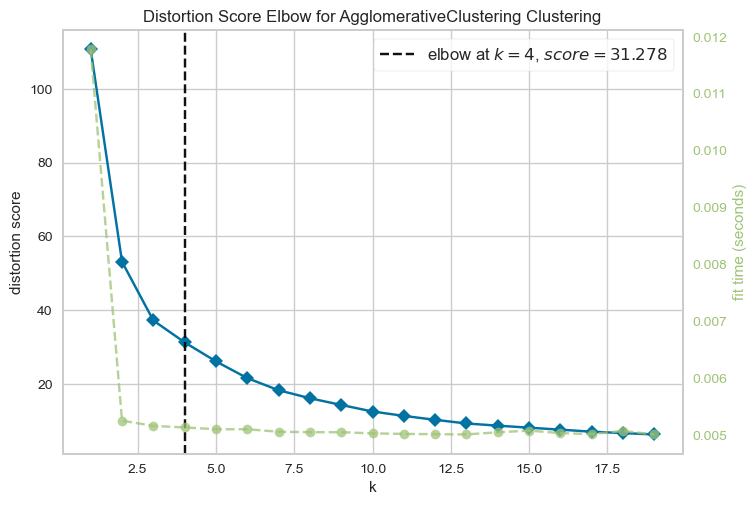

<Axes: title={'center': 'Distortion Score Elbow for AgglomerativeClustering Clustering'}, xlabel='k', ylabel='distortion score'>

In [12]:
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import AgglomerativeClustering

model = AgglomerativeClustering()

k_elbow_visualizer = KElbowVisualizer(model, k=(1, 20))
k_elbow_visualizer.fit(customer_order_df_rfm[['Frequency', 'Recency', 'Monetary']])
k_elbow_visualizer.show()

In [13]:
agloCluster = AgglomerativeClustering(n_clusters=4).fit(customer_order_df_rfm[['Frequency', 'Recency', 'Monetary']])
customer_order_df_rfm['cluster'] = agloCluster.labels_
print(customer_order_df_rfm['cluster'].value_counts())
customer_order_df_rfm

cluster
0    464
1    324
3    107
2     51
Name: count, dtype: int64


,CustomerID,Frequency,Recency,Monetary,cluster
0,1011,0.5,0.550000,0.471795,2
1,1025,0.0,0.350000,0.146647,1
2,1029,0.0,0.000000,0.292677,1
3,1046,0.0,0.716667,0.358080,0
4,1049,0.0,0.216667,0.090224,1
...,...,...,...,...,...
941,9941,0.0,0.700000,0.400622,0
942,9950,0.0,0.633333,0.281745,0
943,9954,0.0,0.200000,0.331970,1
944,9985,0.0,0.950000,0.010125,0


### 시각화
- matplotlib를 사용하여 데이터를 시각화할 수 있고 이를 통해 한 눈에 볼 수 없는 많은 데이터를 한 눈에 볼 수 있다.
- 데이터 분석에 대한 전문 지식이 없는 일반인도 이해할 수 있다.
- 동일한 통계를 가지고 있더라도, 시각화 시 변화나 패턴이 다를 수 있다.

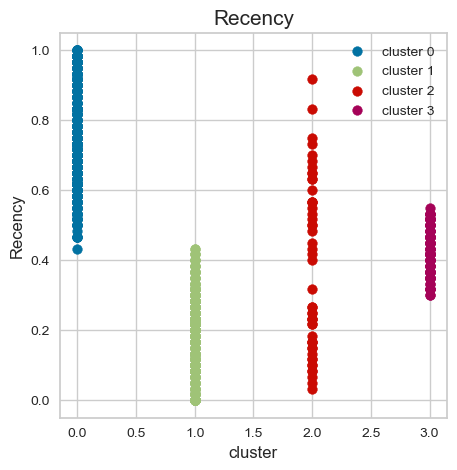

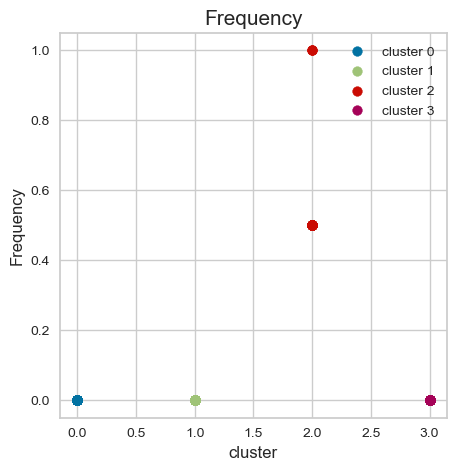

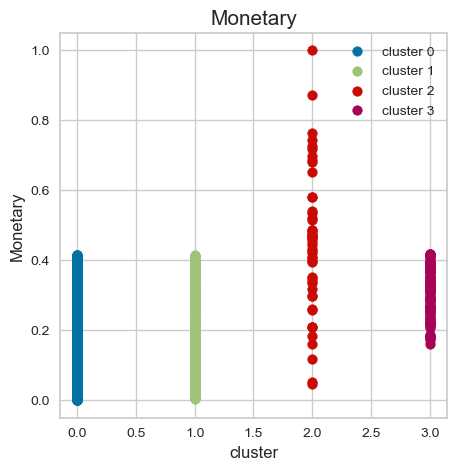

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Recency : 얼마나 최근에 구매했는가
# Frequency : 얼마나 자주 구매했는가
# Monetary : 얼마나 많은 금액을 지출했는가
titles = ['Recency', 'Frequency', 'Monetary']

# 집단 개수
k = 4

# 각 항목별
for title in titles:
    plt.figure(figsize = (5, 5))
    
#     집단 별
    for i in range(k):
#         scatter: 산점도(분포도)
        plt.scatter(customer_order_df_rfm.loc[customer_order_df_rfm['cluster'] == i, 'cluster'], 
                    customer_order_df_rfm.loc[customer_order_df_rfm['cluster'] == i, title],
                    label = f'cluster {i}')
    
#     색상별 제목(label) 표시
    plt.legend()
    plt.title(title, size = 15)
    plt.xlabel('cluster', size = 12)
    plt.ylabel(title, size = 12)
    plt.show()

### boxplot
- 데이터의 분포와 이상치를 한 번에 볼 수 있으며, 서로 다른 집단을 쉽게 비교할 수 있는 차트이다.
<div style="display: flex">
    <img src="./images/boxplot2.png" width="400" style="margin-left: 20px">
    <img src="./images/boxplot1.png" width="400" style="margin-left: 20px">
<div>

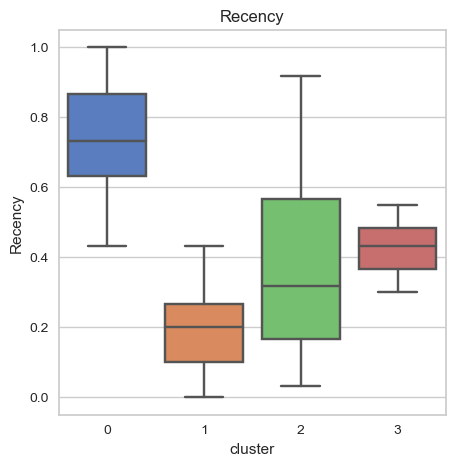

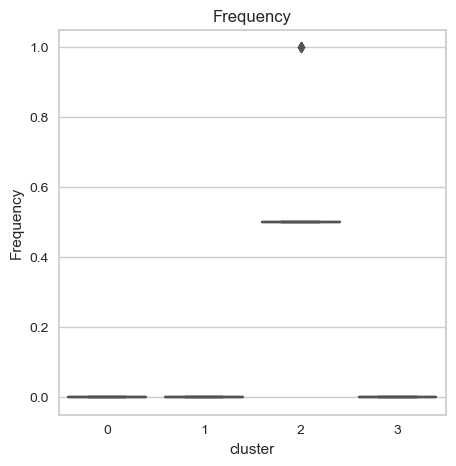

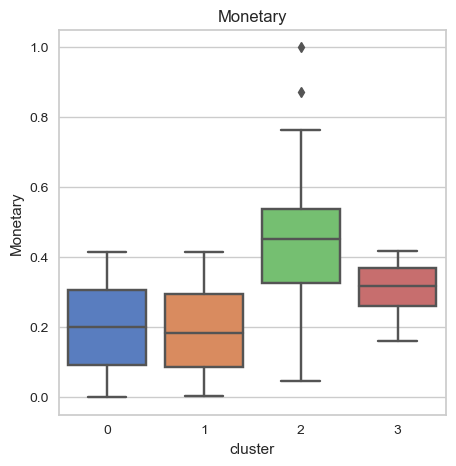

In [15]:
titles = ['Recency', 'Frequency', 'Monetary']

for title in titles:
    plt.figure(figsize = (5, 5))
    sns.boxplot(x = customer_order_df_rfm.cluster, y = customer_order_df_rfm[title], palette='muted')
    plt.title(title)
    plt.show()

- R, F, M 점수는 1~4로 계산함.
- Cluster0과 3은 동점이기 때문에 최근 구매(R)의 중요 여부에 따라 고객 등급을 매길 수 있다.
- 여기서는 최근 구매를 더 중요하다고 가정한다.
> Cluster0: Gold, (4, 1, 2) = 7  
Cluster1: Bronze, (1, 1, 1) = 3  
Cluster2: VIP, (2, 4, 4) = 10  
Cluster3: Silver (3, 1, 3) = 7  

In [16]:
customer_order_df_rfm['cluster'] = customer_order_df_rfm['cluster'].replace([0, 1, 2, 3], ['Gold', 'Bronze', 'VIP', 'Silver'])
customer_order_df_rfm

,CustomerID,Frequency,Recency,Monetary,cluster
0,1011,0.5,0.550000,0.471795,VIP
1,1025,0.0,0.350000,0.146647,Bronze
2,1029,0.0,0.000000,0.292677,Bronze
3,1046,0.0,0.716667,0.358080,Gold
4,1049,0.0,0.216667,0.090224,Bronze
...,...,...,...,...,...
941,9941,0.0,0.700000,0.400622,Gold
942,9950,0.0,0.633333,0.281745,Gold
943,9954,0.0,0.200000,0.331970,Bronze
944,9985,0.0,0.950000,0.010125,Gold


Cluster Count:
cluster
Gold      464
Bronze    324
Silver    107
VIP        51
Name: count, dtype: int64


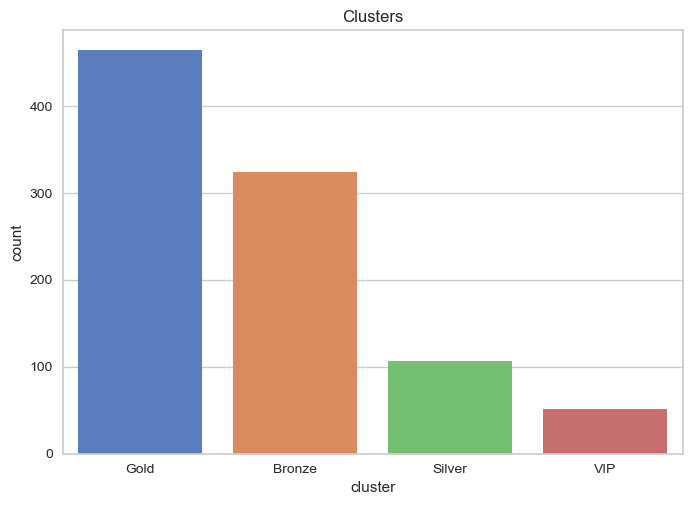

In [17]:
order = ['Gold', 'Bronze', 'Silver', 'VIP']
# create a countplot
print('Cluster Count:')
print(customer_order_df_rfm['cluster'].value_counts())

sns.countplot(x='cluster', data=customer_order_df_rfm, palette='muted', order=order)
plt.title('Clusters')
plt.show()